In [1]:
!pip install pandas


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [61]:
class Perceptron:
    
    def __init__(self, eta:float=None,epoch:int=None):
        
        self.weights = np.random.randn(3)*1e-4 #small random weights
        training = (eta is not None) and (epoch is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}")
        self.eta = eta
        self.epoch = epoch
    
    #function starts with underscore signifies internal method
    def _z_outcome(self,inputs,weights):
        return np.dot(inputs,weights)
    
    def activation_function(self,z):
        return np.where(z>0,1,0 )
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X_with_bias: \n{X_with_bias}")
        
        for epoch in range(self.epoch):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T,self.error)
            print(f"updated weights after epoch: {epoch}/{self.epoch}: \n{self.weights}")
            print("##"*10)
            
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X),1))]
        z = self._z_outcome(X_with_bias,self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
    
    def _create_directory_return_path(self,model_dir,filename):
        os.makedirs(model_dir,exist_ok=True)
        return os.path.join(model_dir,filename)
    
    def save(self,filename,model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_directory_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self._create_directory_return_path('model',filename)
            joblib.dump(self,model_file_path)

    def load(self,filepath):
        return joblib.load(filepath)


In [62]:
AND = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,0,0,1],
}

df_and = pd.DataFrame(AND)
df_and

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [63]:
def prepare_data(df,target_col='y'):
    X = df.drop(target_col,axis=1)
    
    y = df[target_col]
    
    return X,y

In [64]:
X,y = prepare_data(df_and)

ETA = 0.1

EPOCHS = 10

model_and = Perceptron(eta =ETA, epoch = EPOCHS)
model_and.fit(X,y)


_ = model_and.total_loss()

initial weights before training: 
[ 2.05972805e-04  1.02161533e-04 -8.10276492e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 0/10: 
[-0.09979403 -0.09989784  0.29991897]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[2.05972805e-04 1.02161533e-04 1.99918972e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[0.10020597 0.10010216 0.09991897]
####################
--------------------
for epoch >> 3
--------------------
predict

In [65]:
model_and.predict(X=[[1,1]])

array([1])

In [67]:
model_and.save(filename='and.model')

In [68]:
#model re-load
reload_and = Perceptron().load(filepath='model/and.model')

In [69]:
reload_and.predict(X=[[1,0]])

array([0])

In [23]:
#OR gate
OR = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,1,1,1],
}

df_or = pd.DataFrame(OR)
df_or

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [28]:
X,y = prepare_data(df_or)

In [31]:
model_or = Perceptron(eta=0.1,epoch=10)

model_or.fit(X,y)

_ = model_and.total_loss()

initial weights before training: 
[-1.31147424e-04 -1.33248323e-04 -3.97292265e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 0 0 0]
error: 
0   -1
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 0/10: 
[ 0.19986885  0.19986675 -0.20003973]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.19986885  0.19986675 -0.10003973]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 1.99868853e-01  1.99866752e-01 -3.97292265e-05]
####################
--------------------
for epoch >> 3
--------------------
p

In [33]:
#XOR gate

XOR = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,1,1,0],
}

df_xor = pd.DataFrame(XOR)

In [34]:
df_xor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [35]:
X,y = prepare_data(df_xor)

In [38]:
model_xor = Perceptron(eta=0.1,epoch=EPOCHS)

model_xor.fit(X,y)

_ = model_xor.total_loss()

initial weights before training: 
[-5.81782467e-05 -1.29571367e-04  1.71174484e-04]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 0/10: 
[ 0.09994182  0.09987043 -0.19982883]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-5.81782467e-05 -1.29571367e-04  1.71174484e-04]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.09994182  0.09987043 -0.19982883]
####################
--------------------
for epoch >> 3
--------------------
p

In [84]:
#Plotting

def save_plot(df,model,filename='plot.png',plot_dir ='plots'):
    
    def _create_base_plot(df):
        df.plot(kind='scatter',x='x1',y='x2',c='y',s=100,cmap='coolwarm')
        plt.axhline(y=0,color='black',linestyle='--',linewidth=1)
        plt.axvline(x=0,color='black',linestyle='--',linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10,8)
    
    def _plot_decision_region(X,y,classifier,resolution=0.02):
        colors = ('cyan','lightgreen')
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:,0]
        x2 = X[:,1]
        
        x1_min, x1_max = x1.min()-1, x1.max()+1
        x2_min, x2_max = x2.min()-1, x2.max()+1
        
        xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                             np.arange(x2_min,x2_max,resolution)
                             )
        y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1,xx2,y_hat,alpha=0.3,cmap=cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx2.min(),xx2.max())
        
        plt.plot()
        
    X,y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_region(X,y,model)
    
    os.makedirs(plot_dir,exist_ok=True)
    plot_path = os.path.join(plot_dir,filename)
    plt.savefig(plot_path)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 22500 and the array at index 1 has size 4

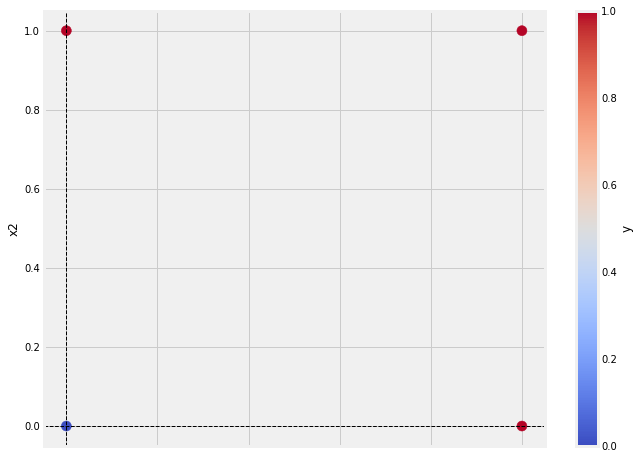

In [85]:
save_plot(df_or,model_or,filename='plot.png',plot_dir ='plots')

In [86]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 22500 and the array at index 1 has size 4

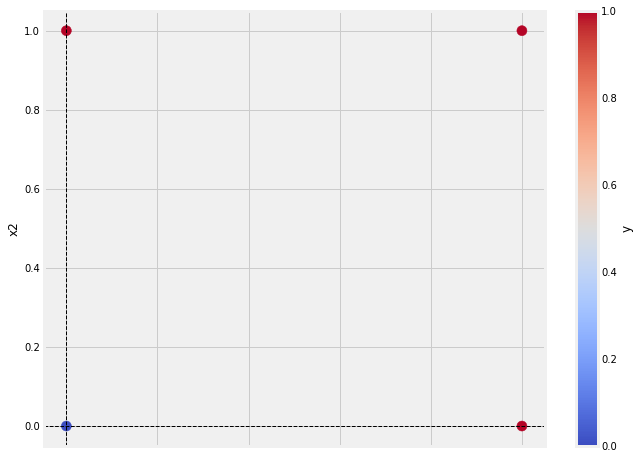

In [87]:


save_plot(df_or, model_or, filename="or.png")



In [88]:
def math_tables(num:int):

    print(f"{num} X 1 = {num}")

    for n in range(2,11):
        print(f"{num} X {n} = {num*n}")

math_tables(4)

4 X 1 = 4
4 X 2 = 8
4 X 3 = 12
4 X 4 = 16
4 X 5 = 20
4 X 6 = 24
4 X 7 = 28
4 X 8 = 32
4 X 9 = 36
4 X 10 = 40


In [106]:
def math_tables(num:int):
    
    if (num == 0):
        print('number should be greater than 0')
    else:
        print(f"{num} X 1 = {num}")
    
        for n in range(2,11):

            print(f"{num} X {n} = {num*n}")

math_tables(3)

3 X 1 = 3
3 X 2 = 6
3 X 3 = 9
3 X 4 = 12
3 X 5 = 15
3 X 6 = 18
3 X 7 = 21
3 X 8 = 24
3 X 9 = 27
3 X 10 = 30
